# 1. Introduction

At Dataquest, we're huge believers in learning through doing, and we hope this shows in your experience with the missions. While missions focus on introducing concepts, challenges allow you to perform deliberate practice by completing structured problems. You can read more about deliberate practice on [Wikipedia](http://bit.ly/2cJ2Qt7) and [at Nautilus](http://nautil.us/issue/35/boundaries/not-all-practice-makes-perfect). Challenges will feel similar to missions, but with little instructional material and a larger focus on exercises.

If you have questions or run into issues, head over to the [Dataquest Community](https://community.dataquest.io/).

# 2. Life and Death of the Avengers

The Avengers are a well-known and widely-loved team of superheroes in the Marvel universe that were originally introduced in the 1960's comic book series. The recent Disney movies re-popularized them, as part of the new [Marvel Cinematic Universe](https://en.wikipedia.org/wiki/Marvel_Cinematic_Universe).

Because the writers killed off and revived many of the superheroes, the team at FiveThirtyEight was curious to explore data from the [Marvel Wikia site](http://marvel.wikia.com/wiki/Main_Page) further. To learn how they collected their data, which is available in their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/avengers), read the write-up they published on [the FiveThirtyEight website](http://fivethirtyeight.com/features/avengers-death-comics-age-of-ultron/).

Header | Definition
---|---------
`URL`| The URL of the comic character on the Marvel Wikia
`Name/Alias` | The full name or alias of the character
`Appearances` | The number of comic books that character appeared in as of April 30 
`Current?` | Is the member currently active on an avengers affiliated team?
`Gender` | The recorded gender of the character
`Probationary` | Sometimes the character was given probationary status as an Avenger, this is the date that happened
`Full/Reserve` | The month and year the character was introduced as a full or reserve member of the Avengers
`Year` | The year the character was introduced as a full or reserve member of the Avengers
`Years since joining` | 2015 minus the year
`Honorary` | The status of the avenger, if they were given "Honorary" Avenger status, if they are simply in the "Academy," or "Full" otherwise
`Death1` | Yes if the Avenger died, No if not. 
`Return1` | Yes if the Avenger returned from their first death, No if  they did not, blank if not applicable
`Death2` | Yes if the Avenger died a second time after their revival, No if they did not, blank if not applicable
`Return2` | Yes if the Avenger returned from their second death, No if they did not, blank if not applicable
`Death3` | Yes if the Avenger died a third time after their second revival, No if they did not, blank if not applicable
`Return3` | Yes if the Avenger returned from their third death, No if they did not, blank if not applicable
`Death4` | Yes if the Avenger died a fourth time after their third revival, No if they did not, blank if not applicable
`Return4` | Yes if the Avenger returned from their fourth death, No if they did not, blank if not applicable
`Death5` | Yes if the Avenger died a fifth time after their fourth revival, No if they did not, blank if not applicable
`Return5` | Yes if the Avenger returned from their fifth death, No if they did not, blank if not applicable
`Notes` | Descriptions of deaths and resurrections. 

# 3. Exploring the Data

In [1]:
import pandas as pd

avengers = pd.read_csv("avengers.csv")
avengers.head(5)

URL  \
0      http://marvel.wikia.com/Henry_Pym_(Earth-616)   
1  http://marvel.wikia.com/Janet_van_Dyne_(Earth-...   
2  http://marvel.wikia.com/Anthony_Stark_(Earth-616)   
3  http://marvel.wikia.com/Robert_Bruce_Banner_(E...   
4   http://marvel.wikia.com/Thor_Odinson_(Earth-616)   

                    Name/Alias  Appearances Current?  Gender  \
0    Henry Jonathan "Hank" Pym         1269      YES    MALE   
1               Janet van Dyne         1165      YES  FEMALE   
2  Anthony Edward "Tony" Stark         3068      YES    MALE   
3          Robert Bruce Banner         2089      YES    MALE   
4                 Thor Odinson         2402      YES    MALE   

  Probationary Introl Full/Reserve Avengers Intro  Year  Years since joining  \
0                 NaN                      Sep-63  1963                   52   
1                 NaN                      Sep-63  1963                   52   
2                 NaN                      Sep-63  1963                   52   
3                 NaN                      Sep-63  1963                   52   
4                 NaN                      Sep-63  1963                   52   

  Honorary  ... Return1 Death2 Return2 Death3 Return3 Death4 Return4 Death5  \
0     Full  ...      NO    NaN     NaN    NaN     NaN    NaN     NaN    NaN   
1     Full  ...     YES    NaN     NaN    NaN     NaN    NaN     NaN    NaN   
2     Full  ...     YES    NaN     NaN    NaN     NaN    NaN     NaN    NaN   
3     Full  ...     YES    NaN     NaN    NaN     NaN    NaN     NaN    NaN   
4     Full  ...     YES    YES      NO    NaN     NaN    NaN     NaN    NaN   

  Return5                                              Notes  
0     NaN  Merged with Ultron in Rage of Ultron Vol. 1. A...  
1     NaN  Dies in Secret Invasion V1:I8. Actually was se...  
2     NaN  Death: "Later while under the influence of Imm...  
3     NaN  Dies in Ghosts of the Future arc. However "he ...  
4     NaN  Dies in Fear Itself brought back because that'...  

[5 rows x 21 columns]

# 4. Filtering Out Bad Data

[]

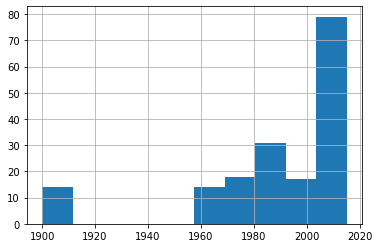

In [2]:
import matplotlib.pyplot as plt
true_avengers = pd.DataFrame()

avengers['Year'].hist()

plt.plot()

As we can see above, some Avengers were introduced in the early 1900s, however this can not be possible as the Avengers not created then. In order to fix this, we can either comb through the data and figure out the true years in which these Avengers were introduced, or we can not include them and only look at Avengers that were introduced in 1960 or later. Here we will go with the second option.

In [3]:
true_avengers=avengers[avengers["Year"]>=1960]

# 5. Consolidating Deaths

In [4]:
def clean_deaths(row):
    deaths=["Death1", "Death2", "Death3", "Death4", "Death5"]
    
    num_deaths=0
    
    for column in deaths:
        death=row[column]
        
        if death=="YES":
            num_deaths+=1
            
    return num_deaths

true_avengers["Deaths"]=true_avengers.apply(clean_deaths,axis=1)

<ipython-input-4-1221ce35e0fe>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_avengers["Deaths"]=true_avengers.apply(clean_deaths,axis=1)


# 6. Verifying Years Since Joining

In [19]:
joined_accuracy_count  = int()

print(true_avengers[true_avengers["Years since joining"]+true_avengers["Year"]==2015])

avenger_years=(true_avengers["Years since joining"]+true_avengers["Year"]).value_counts()

joined_accuracy_count=avenger_years.iloc[0]

                                                   URL  \
0        http://marvel.wikia.com/Henry_Pym_(Earth-616)   
1    http://marvel.wikia.com/Janet_van_Dyne_(Earth-...   
2    http://marvel.wikia.com/Anthony_Stark_(Earth-616)   
3    http://marvel.wikia.com/Robert_Bruce_Banner_(E...   
4     http://marvel.wikia.com/Thor_Odinson_(Earth-616)   
..                                                 ...   
168   http://marvel.wikia.com/Eric_Brooks_(Earth-616)#   
169  http://marvel.wikia.com/Adam_Brashear_(Earth-6...   
170  http://marvel.wikia.com/Victor_Alvarez_(Earth-...   
171     http://marvel.wikia.com/Ava_Ayala_(Earth-616)#   
172         http://marvel.wikia.com/Kaluu_(Earth-616)#   

                      Name/Alias  Appearances Current?  Gender  \
0      Henry Jonathan "Hank" Pym         1269      YES    MALE   
1                 Janet van Dyne         1165      YES  FEMALE   
2    Anthony Edward "Tony" Stark         3068      YES    MALE   
3            Robert Bruce Banner       